**Problem Statement: Here we have a loan company that provides home loans. They are present in rural, urban and semi 
urban areas. What the company would like to do is make the appliction process more automated. In other words, make the
applicants eligibility available in real time. They would like to target the specific customers that are eligible for 
their loans, given the customers segments and factors.**

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
%matplotlib inline
import seaborn as sns

****The Data****

In [2]:
df = pd.read_csv("../downloads/train.csv")

In [3]:
df.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [4]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


From the information above, we can already determine that the data will be skewed when looking at the mean and median.
Other things to note: 84% of applicants have credit history and the applicant and coapplicants income seem to coincide
    with the expected loan amount.

#### Exploratory Analysis

In [6]:
df['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

Frequency table(above), to show the distribution for the non-numerical values

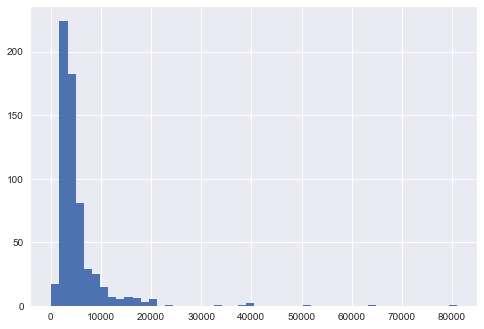

In [7]:
df['ApplicantIncome'].hist(bins=50)

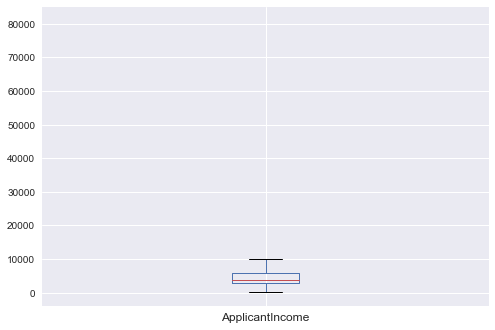

In [8]:
df.boxplot(column='ApplicantIncome')

Boxplot shows the disparity in income. Possibly from differenet education levels.

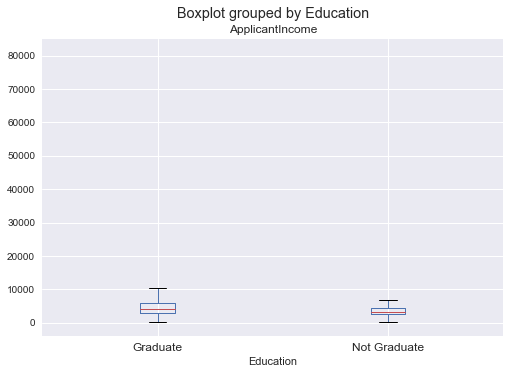

In [11]:
df.boxplot(column='ApplicantIncome', by = 'Education')

No major difference between the mean incone of graduates and non-graduates.

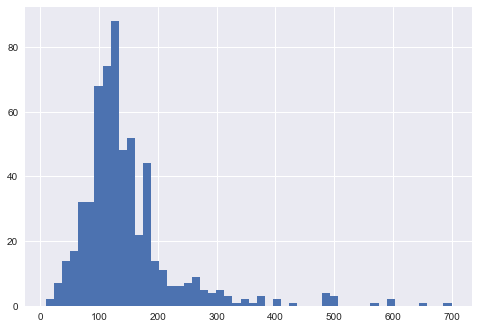

In [13]:
df['LoanAmount'].hist(bins=50)

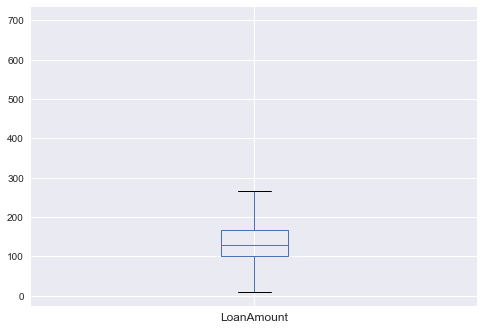

In [14]:
df.boxplot(column='LoanAmount')

There are some extreme values within the loan amount and the applicants income which will require some data munging.
The loan amount has some missing values and extreme values. The applicants income has a few extreme values.

In [15]:
temp1 = df['Credit_History'].value_counts(ascending=True)
temp2 = df.pivot_table(values='Loan_Status',index=['Credit_History'],aggfunc=lambda x: x.map({'Y':1,'N':0}).mean())
print 'Frequency Table for Credit History:' 
print temp1

print '\nProbility of getting loan for each Credit History class:' 
print temp2

Frequency Table for Credit History:
0.0     89
1.0    475
Name: Credit_History, dtype: int64

Probility of getting loan for each Credit History class:
Credit_History
0.0    0.078652
1.0    0.795789
Name: Loan_Status, dtype: float64


Plot the frequency table into bar graphs

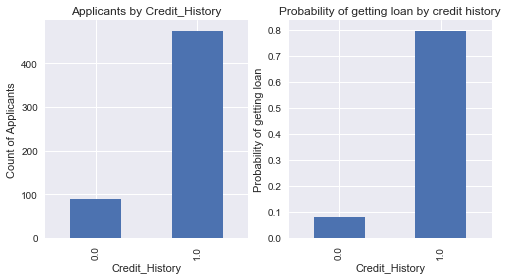

In [16]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,4))
ax1 = fig.add_subplot(121)
ax1.set_xlabel('Credit_History')
ax1.set_ylabel('Count of Applicants')
ax1.set_title("Applicants by Credit_History")
temp1.plot(kind='bar')

ax2 = fig.add_subplot(122)
temp2.plot(kind = 'bar')
ax2.set_xlabel('Credit_History')
ax2.set_ylabel('Probability of getting loan')
ax2.set_title("Probability of getting loan by credit history")

So from the bar graph, we can see that you have a better cahnce of getting a loan, by eight folds, if you have a valid 
credit history.

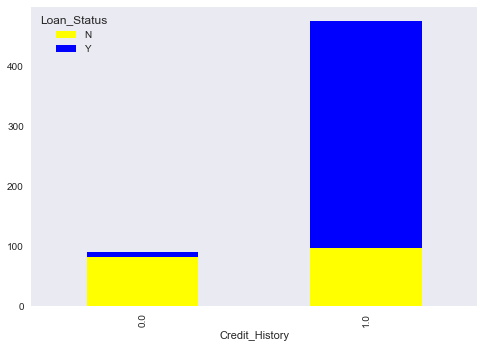

In [17]:
temp3 = pd.crosstab(df['Credit_History'], df['Loan_Status'])
temp3.plot(kind='bar', stacked=True, color=['yellow','blue'], grid=False)

#### Data Munging

We need to check the missing values of our variables to ensure the accuracy of our models.

There are not many missing values, however, those that are should be estimated and added.

In [20]:
 df.apply(lambda x: sum(x.isnull()),axis=0) 

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

There are a couple of ways to fill in the missing values. The simpliest might be to replace those values with the mean.

In [21]:
df['LoanAmount'].fillna(df['LoanAmount'].mean(), inplace=True)

In [93]:
df['Self_Employed'].value_counts()

0    532
1     82
Name: Self_Employed, dtype: int64

Since 86% of the values are "no," we can input the missing values as "no" since there is a high probability of success


In [22]:
df['Self_Employed'].fillna('No', inplace=True)

Creating a pivot table will show the median values of all of the groups of self employed and education. Then we can 
define a function that will show the value of these cells, and then apply it to the missing values of the loan amount.

In [30]:
table = df.pivot_table(values='LoanAmount', 
                       index='Self_Employed', 
                       columns='Education', 
                       aggfunc=np.median)
print (table.unstack())

Education     Self_Employed
Graduate      No               131.0
              Yes              152.0
Not Graduate  No               115.0
              Yes              130.0
dtype: float64


In [40]:
#check all values with NaN in LoanAmount column
print (df.loc[df['LoanAmount'].isnull(), ['Self_Employed','Education', 'LoanAmount']])

Empty DataFrame
Columns: [Self_Employed, Education, LoanAmount]
Index: []


In [48]:
#df['LoanAmount'].fillna(df['LoanAmount'].mean(), inplace=True)

df['Self_Employed'].fillna('No',inplace=True)

In [51]:
print (df.loc[df['LoanAmount'].isnull(), ['Self_Employed','Education', 'LoanAmount']])

Empty DataFrame
Columns: [Self_Employed, Education, LoanAmount]
Index: []


In [57]:
# Replace missing values
df['LoanAmount'] = df.groupby(['Education','Self_Employed'])['LoanAmount'].apply(lambda x: x.fillna(x.median()))

In [58]:
print (df.loc[df.index.isin(idx), ['Self_Employed','Education', 'LoanAmount']])

Empty DataFrame
Columns: [Self_Employed, Education, LoanAmount]
Index: []


First we want to analyze the loan amount. We know that some people may apply for high value loans due to their specific
needs, based on the extreme values. So we will treat them as a log transformation, to nullify their effect, as opposed
to treating them as outliers.

The code below will make it more of a normal distribution and decrease the extreme values.

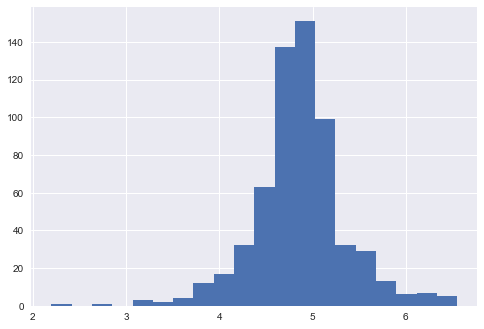

In [62]:
 df['LoanAmount_log'] = np.log(df['LoanAmount'])
df['LoanAmount_log'].hist(bins=20)

For the applicants income, you may think that some applicants who have lower incomes may have a strong co-applicant.
So as a good idea, we can combine both incomes as the total income and take a log transformation of the same.This will provide a more normal distribution. 

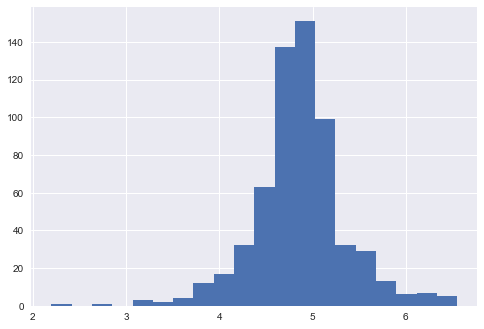

In [63]:
df['TotalIncome'] = df['ApplicantIncome'] + df['CoapplicantIncome']
df['TotalIncome_log'] = np.log(df['TotalIncome'])
df['LoanAmount_log'].hist(bins=20) 

Convert all of our categorical variables into numeric

In [64]:
 from sklearn.preprocessing import LabelEncoder
var_mod = ['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status']
le = LabelEncoder()
for i in var_mod:
    df[i] = le.fit_transform(df[i])
df.dtypes

/Users/kamarricummings/anaconda/lib/python2.7/site-packages/numpy/lib/arraysetops.py:200: FutureWarning: numpy not_equal will not check object identity in the future. The comparison did not return the same result as suggested by the identity (`is`)) and will change.
  flag = np.concatenate(([True], aux[1:] != aux[:-1]))


Loan_ID               object
Gender                 int64
Married                int64
Dependents             int64
Education              int64
Self_Employed          int64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int64
Loan_Status            int64
LoanAmount_log       float64
TotalIncome          float64
TotalIncome_log      float64
dtype: object

In [71]:
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import KFold   #This is for K-fold cross validation
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics

#This is the generic function for making a classification model and accessing performance:
def classification_model(model, data, predictors, outcome):
  #Fit the model:
  model.fit(data[predictors],data[outcome])
  
  #Used to make predictions on training set:
  predictions = model.predict(data[predictors])
  
  #Print accuracy
  accuracy = metrics.accuracy_score(predictions,data[outcome])
  print "Accuracy : %s" % "{0:.3%}".format(accuracy)

  #For the purpose to perform k-fold cross-validation with 5' folds
  kf = KFold(data.shape[0], n_folds=5)
  error = []
  for train, test in kf:
    # Now filter the training data
    train_predictors = (data[predictors].iloc[train,:])
    
    # Then this is the target we're using to train the algorithm.
    train_target = data[outcome].iloc[train]
    
    # Followed by training the algorithm using the predictors and target.
    model.fit(train_predictors, train_target)
    
    #Finally, we record error from each cross-validation run
    error.append(model.score(data[predictors].iloc[test,:], data[outcome].iloc[test]))
 
  print "Cross-Validation Score : %s" % "{0:.3%}".format(np.mean(error))

  #Then we fit the model again so that it can be refered outside the function:
  model.fit(data[predictors],data[outcome]) 

Logistic Regression: attempt to avoid overfitting

Model for credit history

In [72]:
outcome_var = 'Loan_Status'
model = LogisticRegression()
predictor_var = ['Credit_History']
classification_model(model, df,predictor_var,outcome_var)

Accuracy : 77.036%
Cross-Validation Score : 77.041%


In [73]:
#Attempt different combination of variables:
predictor_var = ['Credit_History','Education','Married','Self_Employed','Property_Area']
classification_model(model, df,predictor_var,outcome_var)

Accuracy : 77.036%
Cross-Validation Score : 77.041%


In [74]:
model = DecisionTreeClassifier()
predictor_var = ['Credit_History','Gender','Married','Education']
classification_model(model, df,predictor_var,outcome_var)

Accuracy : 77.199%
Cross-Validation Score : 76.553%


Decision trees typically provide a higher rate of accuracy than a logistic regression model.

In [78]:
import numpy as np

test = np.array([0.1, 0.3, float("Inf"), 0.2])

bad_indices = np.where(np.isinf(test))

print(bad_indices)

(array([2]),)


In [79]:
test[bad_indices] = -1

In [82]:
model = RandomForestClassifier(n_estimators=25, min_samples_split=25, max_depth=7, max_features=1)
predictor_var = ['TotalIncome_log','LoanAmount_log','Credit_History','Dependents','Property_Area']
classification_model(model, df,predictor_var,outcome_var)

Accuracy : 81.107%
Cross-Validation Score : 74.594%


#### Solutions on the chances of securing a loan:

-Having a higher level of education.

-Having a higher level of total income(both for applicant and co-applicant).

-Properties with a higher rate of growth.

-Having a credit score.

Using the best model, random forest, we see that, based on the variables, there is an 81% chance of securing that loan.